# Sep 25th, 2021

**Motivation**: This has the most succesfull registration of Nissl to Yale N162 0.1 mm <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import load_allen, make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
mice = Mice(Config(32), load_preproc=True)

In [3]:
from register.register import *
reg = Register(mice, resolution=100)

In [5]:
_dir = '/home/hadi/Dropbox/git/jb-Ca-fMRI/nb/sep21/sep26_dfs'
df = pd.read_pickle(pjoin(_dir, 'sub-SLC01_ses-1.df'))

In [6]:
df

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score
0,0,SyN,0.2,16,13,0.2,mi,0.489101
1,0,SyN,0.2,16,13,0.2,sym_iso,0.995775
2,0,SyN,0.2,16,13,0.2,sym_vis,0.900850
3,0,SyN,0.2,16,13,0.2,ovp_iso,0.965855
4,0,SyN,0.2,16,13,0.2,ovp_vis,0.965248
...,...,...,...,...,...,...,...,...
5693,9,ElasticSyN,0.3,32,32,0.8,sym_vis_fixed,0.941349
5694,9,ElasticSyN,0.3,32,32,0.8,ovp_iso_fixed,1.000000
5695,9,ElasticSyN,0.3,32,32,0.8,ovp_vis_fixed,1.000000
5696,9,ElasticSyN,0.3,32,32,0.8,sym_fixed,0.978662


In [ ]:
indiv2nissl, perf:
seed               1
type             SyN
grad             0.2
syn_bin           32
aff_bin           20
aff_rate         0.2
metric           sym
score       0.999042

In [8]:
_df = df.loc[
    (df['seed'] == 1) &
    (df['type'] == 'SyN') &
    (df['grad'] == 0.2) &
    (df['syn_bin'] == 32) &
    (df['aff_bin'] == 20) &
    (df['aff_rate'] == 0.2)
]
_df

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score
700,1,SyN,0.2,32,20,0.2,mi,0.455085
701,1,SyN,0.2,32,20,0.2,sym_iso,0.998723
702,1,SyN,0.2,32,20,0.2,sym_vis,1.000000
703,1,SyN,0.2,32,20,0.2,ovp_iso,0.956971
704,1,SyN,0.2,32,20,0.2,ovp_vis,0.953803
705,1,SyN,0.2,32,20,0.2,sym,0.999042
706,1,SyN,0.2,32,20,0.2,ovp,0.956179
707,1,SyN,0.2,32,20,0.2,mi_fixed,0.326393
708,1,SyN,0.2,32,20,0.2,sym_iso_fixed,0.998349
709,1,SyN,0.2,32,20,0.2,sym_vis_fixed,0.996212


In [52]:
_df = df.loc[
    (df['seed'] == 1) &
    (df['type'] == 'ElasticSyN') &
    (df['grad'] == 0.3) &
    (df['syn_bin'] == 32) &
    (df['aff_bin'] == 20) &
    (df['aff_rate'] == 0.2)
]
_df

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score
1120,1,ElasticSyN,0.3,32,20,0.2,mi,0.499643
1121,1,ElasticSyN,0.3,32,20,0.2,sym_iso,0.995365
1122,1,ElasticSyN,0.3,32,20,0.2,sym_vis,0.975434
1123,1,ElasticSyN,0.3,32,20,0.2,ovp_iso,0.967695
1124,1,ElasticSyN,0.3,32,20,0.2,ovp_vis,0.965157
1125,1,ElasticSyN,0.3,32,20,0.2,sym,0.990382
1126,1,ElasticSyN,0.3,32,20,0.2,ovp,0.967060
1127,1,ElasticSyN,0.3,32,20,0.2,mi_fixed,0.328362
1128,1,ElasticSyN,0.3,32,20,0.2,sym_iso_fixed,0.991790
1129,1,ElasticSyN,0.3,32,20,0.2,sym_vis_fixed,0.969072


<matplotlib.lines.Line2D object at 0x7e9fb7ca4490>

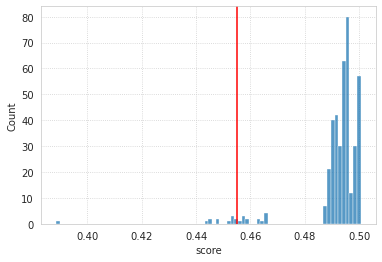

In [17]:
sns.histplot(df.loc[df['metric'] == 'mi', 'score'])
plt.axvline(0.455085, color='r')

In [18]:
np.nanquantile(df.loc[df['metric'] == 'mi', 'score'].values, [0.25, 0.50, 0.75, 0.9999])

array([0.49124635, 0.49417082, 0.49633862, 0.50050671])

In [20]:
qs = np.nanquantile(df.loc[df['metric'] == 'mi', 'score'].values, [0.25, 0.50, 0.75, 0.9999])
qs

array([0.49124635, 0.49417082, 0.49633862, 0.50050671])

In [ ]:
df #= df.loc[df['metric'] == 'mi', 'score']

In [22]:
df

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score
0,0,SyN,0.2,16,13,0.2,mi,0.489101
1,0,SyN,0.2,16,13,0.2,sym_iso,0.995775
2,0,SyN,0.2,16,13,0.2,sym_vis,0.900850
3,0,SyN,0.2,16,13,0.2,ovp_iso,0.965855
4,0,SyN,0.2,16,13,0.2,ovp_vis,0.965248
...,...,...,...,...,...,...,...,...
5693,9,ElasticSyN,0.3,32,32,0.8,sym_vis_fixed,0.941349
5694,9,ElasticSyN,0.3,32,32,0.8,ovp_iso_fixed,1.000000
5695,9,ElasticSyN,0.3,32,32,0.8,ovp_vis_fixed,1.000000
5696,9,ElasticSyN,0.3,32,32,0.8,sym_fixed,0.978662


In [41]:
df_mi = df.loc[df['metric'] == 'mi']
df_sym = df.loc[df['metric'] == 'sym']
df_mi = df_mi.reset_index(drop=True)
df_sym = df_sym.reset_index(drop=True)

In [42]:
df_mi

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score
0,0,SyN,0.2,16,13,0.2,mi,0.489101
1,0,SyN,0.2,16,13,0.8,mi,0.490738
2,0,SyN,0.2,16,20,0.2,mi,0.491158
3,0,SyN,0.2,16,20,0.8,mi,0.490787
4,0,SyN,0.2,16,32,0.2,mi,0.388476
...,...,...,...,...,...,...,...,...
402,9,ElasticSyN,0.3,32,13,0.8,mi,0.498998
403,9,ElasticSyN,0.3,32,20,0.2,mi,0.499637
404,9,ElasticSyN,0.3,32,20,0.8,mi,0.499897
405,9,ElasticSyN,0.3,32,32,0.2,mi,0.499898


In [60]:
test = df_sym.loc[df_mi['score'] > np.nanquantile(df_mi['score'], 0.9)]
test

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score
21,0,SyN,0.3,32,32,0.8,sym,0.965460
40,0,ElasticSyN,0.3,32,20,0.2,sym,0.973053
41,0,ElasticSyN,0.3,32,20,0.8,sym,0.972017
42,0,ElasticSyN,0.3,32,32,0.2,sym,0.959353
43,0,ElasticSyN,0.3,32,32,0.8,sym,0.968123
61,1,SyN,0.3,32,20,0.8,sym,0.977090
63,1,SyN,0.3,32,32,0.8,sym,0.974232
80,1,ElasticSyN,0.3,32,20,0.2,sym,0.990382
81,1,ElasticSyN,0.3,32,20,0.8,sym,0.967733
82,1,ElasticSyN,0.3,32,32,0.2,sym,0.974290


<AxesSubplot:xlabel='score', ylabel='Count'>

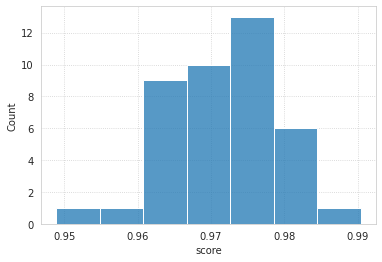

In [61]:
sns.histplot(test['score'])

In [62]:
test.iloc[[test['score'].argmax()]]

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score
80,1,ElasticSyN,0.3,32,20,0.2,sym,0.990382


In [79]:
key = 'sub-SLC01_ses-3'
indiv = mice.T1w[key].get_data()
indiv = reg._prepare(indiv)
m_indiv = mice.mask3d[key].get_data()
m_indiv = reg._prepare(m_indiv.astype('uint32'))

In [80]:
_dir = '/home/hadi/Dropbox/git/jb-Ca-fMRI/nb/sep21/sep26_dfs'
df = pd.read_pickle(pjoin(_dir, 'sub-SLC01_ses-3.df'))

In [90]:
mi = df.loc[df['metric'] == 'mi']
sym = df.loc[df['metric'] == 'sym']
mi = mi.reset_index(drop=True)
sym = sym.reset_index(drop=True)
cond = mi['score'] > np.nanquantile(mi['score'], 0.75)
_df = sym.loc[cond]

<AxesSubplot:xlabel='score', ylabel='Count'>

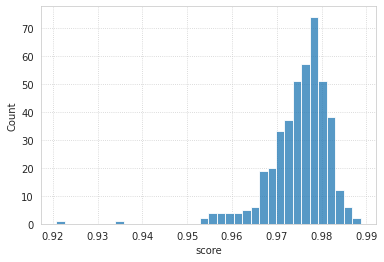

In [91]:
sns.histplot(sym['score'])

In [82]:
best_params = _df.iloc[_df['score'].argmax()]
best_params = best_params.drop(['metric', 'score'])
best_params = dict(zip(
    best_params.index,
    best_params.values,
))
best_params

{
    'seed': 4,
    'type': 'SyN',
    'grad': 0.3,
    'syn_bin': 16,
    'aff_bin': 13,
    'aff_rate': 0.2
}

In [83]:
cond = [
    np.array(_df[k] == v)
    for k, v in best_params.items()
]
cond = functools.reduce(np.logical_and, cond)
_df = _df.loc[cond]
_df = _df.iloc[_df['score'].argmax()]
print(_df.to_string())

seed               4
type             SyN
grad             0.3
syn_bin           16
aff_bin           13
aff_rate         0.2
metric           sym
score       0.985987

In [85]:
_df = df.loc[
    (df['seed'] == 0) &
    (df['type'] == 'ElasticSyN') &
    (df['grad'] == 0.3) &
    (df['syn_bin'] == 32) &
    (df['aff_bin'] == 20) &
    (df['aff_rate'] == 0.2)
]
_df

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score
602,0,ElasticSyN,0.3,32,20,0.2,mi,0.463224
603,0,ElasticSyN,0.3,32,20,0.2,sym_iso,0.996335
604,0,ElasticSyN,0.3,32,20,0.2,sym_vis,0.965812
605,0,ElasticSyN,0.3,32,20,0.2,ovp_iso,0.965835
606,0,ElasticSyN,0.3,32,20,0.2,ovp_vis,0.989529
607,0,ElasticSyN,0.3,32,20,0.2,sym,0.988704
608,0,ElasticSyN,0.3,32,20,0.2,ovp,0.971758
609,0,ElasticSyN,0.3,32,20,0.2,mi_fixed,0.325224
610,0,ElasticSyN,0.3,32,20,0.2,sym_iso_fixed,0.993805
611,0,ElasticSyN,0.3,32,20,0.2,sym_vis_fixed,0.970370


<matplotlib.lines.Line2D object at 0x7e9fb43fbc40>

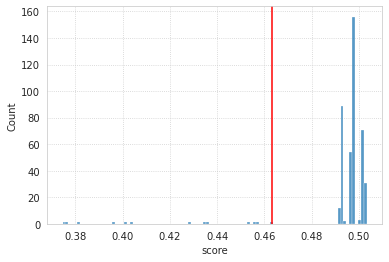

In [86]:
sns.histplot(df.loc[df['metric'] == 'mi', 'score'])
plt.axvline(0.463224, color='r')

In [64]:
df_tx, best_tx, perf = reg.fit_register(
    mode='3d',
    name='indiv2nissl',
    fixed=reg.nissl,
    moving=indiv,
    save_results=False,
    types=['ElasticSyN'],#, 'SyNAggro'],
    grads=[0.3],# [0.15, 0.2, 0.25, 0.3],
    syn_bins=[32],
    aff_bins=[20],
    aff_rates=[0.2],
    n_seeds=10,
)

  0%|          | 0/10 [00:00<?, ?it/s]

indiv2nissl, perf:
seed                 4
type        ElasticSyN
grad               0.3
syn_bin             32
aff_bin             20
aff_rate           0.2
metric             sym
score         0.980975

In [65]:
iso_yale = ants.apply_transforms(
    fixed=indiv,
    moving=reg.objects['ISO'],
    transformlist=best_tx['invtransforms'],
    interpolator='genericLabel',
)
vis_yale = ants.apply_transforms(
    fixed=indiv,
    moving=reg.objects['VIS'],
    transformlist=best_tx['invtransforms'],
    interpolator='genericLabel',
)
ants.image_write(iso_yale, f"./iso_direct_{key}_Best.nii.gz")
ants.image_write(vis_yale, f"./vis_direct_{key}_Best.nii.gz")

In [49]:
iso_indiv.numpy().astype(bool).sum()

13346

In [50]:
vis_indiv.numpy().astype(bool).sum()

1472

In [51]:
iso_indiv.numpy().astype(bool).sum() / vis_indiv.numpy().astype(bool).sum()

9.066576086956522

In [52]:
list(mice.parcel.results['major_masks'])

[
    'PAL',
    'STR',
    'CTXsp',
    'OLF',
    'HIP',
    'RHP',
    'IB',
    'MB',
    'HB',
    'CB',
    'VIS',
    'TEa',
    'PERI',
    'ECT',
    'RSP',
    'AUD',
    'PTLp',
    'VISC',
    'SS',
    'SSp',
    'SSp-bfd',
    'SSp-ll',
    'SSp-m',
    'SSp-n',
    'SSp-tr',
    'SSp-ul',
    'SSp-un',
    'SSs',
    'GU',
    'ACA',
    'AI',
    'MO',
    'MOp',
    'MOs',
    'ILA',
    'PL',
    'ORB',
    'FRP'
]

In [7]:
key = 'sub-SLC01_ses-2'
indiv = mice.T1w[key].get_data()
indiv = reg._prepare(indiv)
m_indiv = mice.mask3d[key].get_data()
m_indiv = reg._prepare(m_indiv.astype('uint32'))
print(key)

sub-SLC01_ses-2

In [8]:
ants.image_write(indiv, f"{key}.nii.gz")
ants.image_write(m_indiv, f"{key}_mask.nii.gz")

In [9]:
df_tx, best_tx, perf = reg.fit_register(
    mode='3d',
    name='nissl2yale',
    fixed=indiv,
    moving=reg.nissl,
    save_results=False,
    types=['SyN', 'ElasticSyN', 'SyNAggro'],
    grads=[0.2, 0.4],
    syn_bins=[8, 16, 32],
    aff_bins=[8, 16, 32],
    aff_rates=[0.2, 0.5, 0.8],
    n_seeds=5,
)

  0%|          | 0/5 [00:00<?, ?it/s]

nissl2yale, perf:
seed                 3
type        ElasticSyN
grad               0.4
syn_bin             32
aff_bin             32
aff_rate           0.8
metric             sym
score         0.993072

In [10]:
_df = df_tx.loc[
    (df_tx['seed'] == 3) &
    (df_tx['type'] == 'ElasticSyN') &
    (df_tx['grad'] == 0.4) &
    (df_tx['syn_bin'] == 32) &
    (df_tx['aff_bin'] == 32) &
    (df_tx['aff_rate'] == 0.8)
]
_df

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score,tx
2372,3,ElasticSyN,0.4,32,32,0.8,mi,0.563716,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
2373,3,ElasticSyN,0.4,32,32,0.8,sym_iso,0.998893,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
2374,3,ElasticSyN,0.4,32,32,0.8,sym_vis,0.987252,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
2375,3,ElasticSyN,0.4,32,32,0.8,sym,0.993072,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


<matplotlib.lines.Line2D object at 0x7ee56473d8e0>

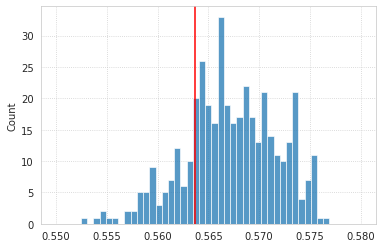

In [22]:
sns.histplot(df_tx.loc[df_tx['metric'] == 'mi', 'score'].values, bins=np.linspace(0.55, 0.58, 50))
plt.axvline(_df.iloc[0]['score'], color='r')

In [23]:
warped = ants.apply_transforms(
    fixed=indiv,
    moving=reg.nissl,
    transformlist=best_tx['fwdtransforms'],
    interpolator='linear',
)
iso_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=reg.iso,
    transformlist=best_tx['fwdtransforms'],
    interpolator='genericLabel',
)
vis_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=reg.vis,
    transformlist=best_tx['fwdtransforms'],
    interpolator='genericLabel',
)
mask_r_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=reg.mask_r,
    transformlist=best_tx['fwdtransforms'],
    interpolator='genericLabel',
)
mask_l_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=reg.mask_l,
    transformlist=best_tx['fwdtransforms'],
    interpolator='genericLabel',
)

mi = ants.image_mutual_information(indiv, warped)
mi_base = ants.image_mutual_information(indiv, indiv)

score_iso = symmetry_score(
    m=iso_indiv.numpy().astype(bool),
    mask_l=mask_l_indiv.numpy().astype(bool),
    mask_r=mask_r_indiv.numpy().astype(bool),
)
score_vis = symmetry_score(
    m=vis_indiv.numpy().astype(bool),
    mask_l=mask_l_indiv.numpy().astype(bool),
    mask_r=mask_r_indiv.numpy().astype(bool),
)
print(f"mi: {mi / mi_base:.4f},\tiso: {score_iso:.4f},\tvis: {score_vis:.4f}")

mi: 0.5637,     iso: 0.9989,    vis: 0.9873

In [24]:
ants.image_write(iso_indiv, f"./{key}_iso_Best.nii.gz")
ants.image_write(vis_indiv, f"./{key}_vis_Best.nii.gz")

In [26]:
ants.image_write(iso_indiv * m_indiv, f"./{key}_iso-fixed_Best.nii.gz")
ants.image_write(vis_indiv * m_indiv, f"./{key}_vis-fixed_Best.nii.gz")

In [25]:
mi = ants.image_mutual_information(indiv, (warped * m_indiv))
mi_base = ants.image_mutual_information(indiv, indiv)

score_iso = symmetry_score(
    m=(iso_indiv * m_indiv).numpy().astype(bool),
    mask_l=mask_l_indiv.numpy().astype(bool),
    mask_r=mask_r_indiv.numpy().astype(bool),
)
score_vis = symmetry_score(
    m=(vis_indiv * m_indiv).numpy().astype(bool),
    mask_l=mask_l_indiv.numpy().astype(bool),
    mask_r=mask_r_indiv.numpy().astype(bool),
)
print(f"mi: {mi / mi_base:.4f},\tiso: {score_iso:.4f},\tvis: {score_vis:.4f}")

mi: 0.6238,     iso: 0.9936,    vis: 0.9923

- objective 1: find a criterion that returns the best fit
- objective 2: find other ones that are not the best (according to criterion in objective 1) but they look better if visualized
- objective 3: is it good enough to just choose the best performing one in objective 1? or should I revise the criterion?

In [27]:
df_tx

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score,tx
0,0,SyN,0.2,8,8,0.2,mi,0.302461,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
1,0,SyN,0.2,8,8,0.2,sym_iso,0.463862,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
2,0,SyN,0.2,8,8,0.2,sym_vis,0.001013,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
3,0,SyN,0.2,8,8,0.2,sym,0.232438,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
4,0,SyN,0.2,8,8,0.5,mi,0.561651,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
...,...,...,...,...,...,...,...,...,...
3235,4,SyNAggro,0.4,32,32,0.5,sym,0.963747,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
3236,4,SyNAggro,0.4,32,32,0.8,mi,0.563454,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
3237,4,SyNAggro,0.4,32,32,0.8,sym_iso,0.967274,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
3238,4,SyNAggro,0.4,32,32,0.8,sym_vis,0.997195,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


In [ ]:
types=['SyN', 'ElasticSyN', 'SyNAggro'],
grads=[0.2, 0.4],
syn_bins=[8, 16, 32],
aff_bins=[8, 16, 32],
aff_rates=[0.2, 0.5, 0.8],
n_seeds=5,

<seaborn.axisgrid.FacetGrid object at 0x7ee56472a430>

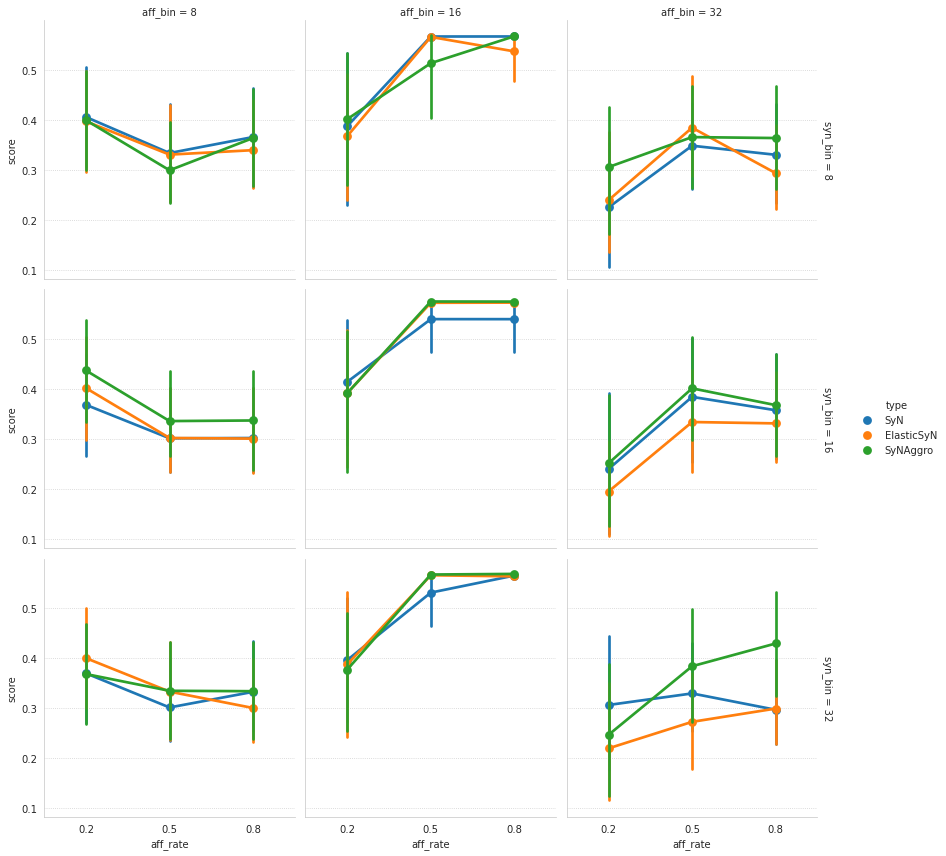

In [29]:
sns.catplot(
    data=df_tx.loc[df_tx['metric'] == 'mi'],
    x='aff_rate',
    y='score',
    hue='type',
    row='syn_bin',
    col='aff_bin',
    kind='point',
    margin_titles=True,
    size=4,
)

<seaborn.axisgrid.FacetGrid object at 0x7ee56474c880>

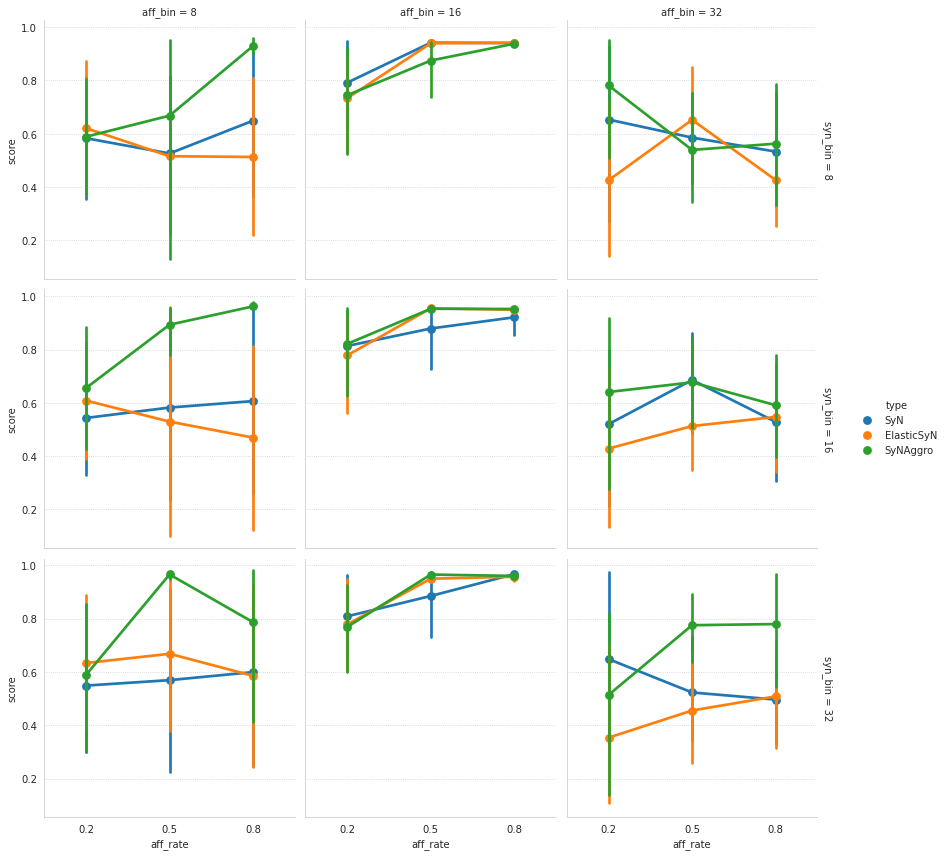

In [31]:
sns.catplot(
    data=df_tx.loc[df_tx['metric'] == 'sym'],
    x='aff_rate',
    y='score',
    hue='type',
    row='syn_bin',
    col='aff_bin',
    kind='point',
    margin_titles=True,
    size=4,
)

In [32]:
df = df_tx.loc[df_tx['aff_bin'] == 16]

<seaborn.axisgrid.FacetGrid object at 0x7ee534114040>

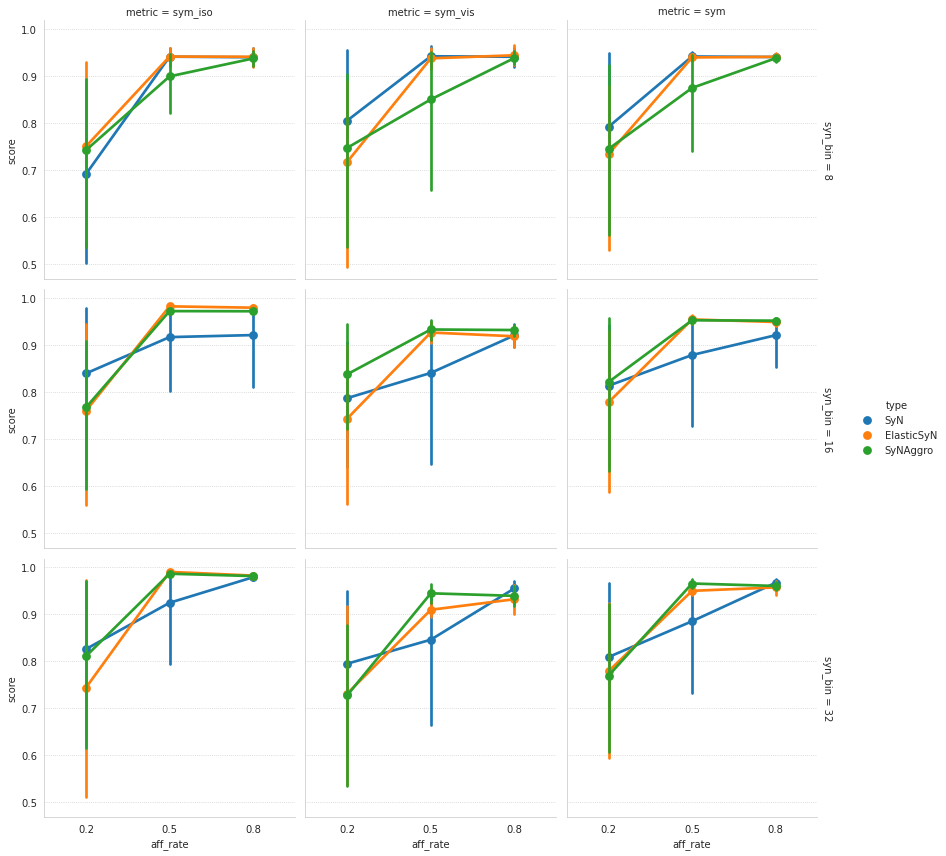

In [35]:
sns.catplot(
    data=df.loc[df['metric'] != 'mi'],
    x='aff_rate',
    y='score',
    col='metric',
    row='syn_bin',
    hue='type',
    kind='point',
    margin_titles=True,
    size=4,
)

In [36]:
df = df_tx.loc[
    (df_tx['aff_bin'] == 16) &
    (df_tx['syn_bin'] == 16)
]

<seaborn.axisgrid.FacetGrid object at 0x7ee4c87dd250>

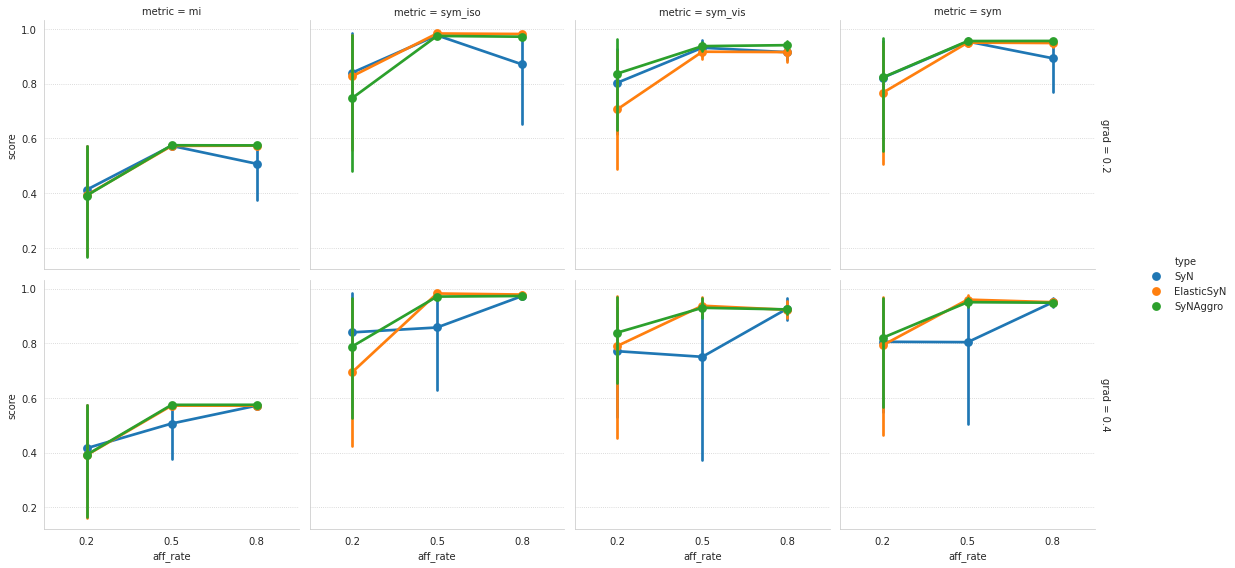

In [39]:
sns.catplot(
    data=df,
    x='aff_rate',
    y='score',
    col='metric',
    row='grad',
    hue='type',
    kind='point',
    margin_titles=True,
    size=4,
)